In [2]:
# import required packages
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.1.0'

In [4]:
# class names in the dataset
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [5]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 151s 1us/step


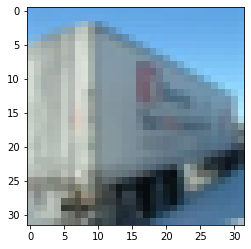

In [7]:
plt.imshow(x_train[15])

In [8]:
# normalizing the data
x_train = x_train/255.0

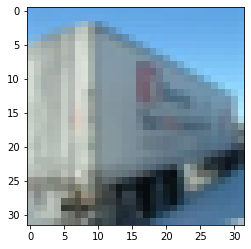

In [10]:
plt.imshow(x_train[15])

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
# normalizing the data
x_test = x_test/255.0

In [28]:
# defining my model
model = tf.keras.models.Sequential()

# adding first convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))

# adding maxpooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding = 'same'))          
    
# adding second convolutional layer
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))

# adding maxpooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding = 'valid'))  


model.add(tf.keras.layers.Dropout(0.15))



# adding third convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
          

# adding fourth convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# adding maxpooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding = 'valid'))          

# adding a flattening layer
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.15))

          
# adding a dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# adding an output layer
model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))          

In [29]:
# summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          73792     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)         

In [30]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['sparse_categorical_accuracy'])

In [31]:
# training the model
model.fit(x_train, y_train, epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 211s 4ms/sample - loss: 1.5106 - sparse_categorical_accuracy: 0.4436
Epoch 2/25
50000/50000 [==============================] - 197s 4ms/sample - loss: 1.0719 - sparse_categorical_accuracy: 0.6198
Epoch 3/25
50000/50000 [==============================] - 202s 4ms/sample - loss: 0.9009 - sparse_categorical_accuracy: 0.6811
Epoch 4/25
50000/50000 [==============================] - 190s 4ms/sample - loss: 0.7984 - sparse_categorical_accuracy: 0.7190
Epoch 5/25
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.7248 - sparse_categorical_accuracy: 0.7461
Epoch 6/25
50000/50000 [==============================] - 218s 4ms/sample - loss: 0.6659 - sparse_categorical_accuracy: 0.7650
Epoch 7/25
50000/50000 [==============================] - 217s 4ms/sample - loss: 0.6176 - sparse_categorical_accuracy: 0.7827
Epoch 8/25
50000/50000 [==============================] - 229s 5ms/sample - loss: 0.5721

In [32]:
# evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 10s 1ms/sample - loss: 0.9183 - sparse_categorical_accuracy: 0.7617


In [33]:
# the accuracy and the loss
print("Test accuracy {}".format(test_accuracy))
print("Test loss {}".format(test_loss))

Test accuracy 0.7616999745368958
Test loss 0.9182588661670685
